The code below estimates $\int_0^1 e^{x^2/2}$

In [34]:
n = n
a = 0
b = 1
u = runif(n, a, b)
x = 1 
hx = function(x,u){
    exp((-(x*u)^2)/2)
}
true_val = (1 - pnorm(0) - pnorm(1, lower.tail=FALSE))*sqrt(2*pi)
est = mean(hx(x, u))# 0.5 since x positive
error = abs(est-true_val)/true_val

In [35]:
est

[1] 0.8532816

In [36]:
true_val

[1] 0.8556244

In [37]:
error

[1] 0.002738106

To look at the error:

In [5]:
hx = function(x,u){
        exp((-(x*u)^2)/2)
}

In [32]:
sample = 100
error_from_n = rep(NA,5)
ns = c(10, 30, 50, 100, 250, 500)
for (j in 1:length(ns)) {
    n = ns[j]
    errors = rep(NA, sample)
    n = n
    a = 0
    b = 1
    for (i in 1:sample){
        u = runif(n, a, b)
        x = 1 
        true_val = (1 - pnorm(0) - pnorm(1, lower.tail=FALSE))*sqrt(2*pi)
        est = mean(hx(x, u))# 0.5 since x positive
        error = abs(est-true_val)/true_val
        errors[i] = error
    }
    error_from_n[j] = mean(errors)
}

In [33]:
data.frame(ns, error_from_n)

ns,error_from_n
<dbl>,<dbl>
10,0.033015262
30,0.020783794
50,0.016324177
100,0.011439409
250,0.007681428
500,0.005314605


To check with pnorm, need to multiply by $\sqrt(2*\pi)$

In [13]:
(1 - pnorm(0) - pnorm(1, lower.tail=FALSE))*sqrt(2*pi)

[1] 0.8556244

Examining the performance across different values of x

In [13]:
hx = function(x, u){
        exp((-(x*u)^2)/2)
}

In [16]:
xs = seq(0.1, 3, 0.1)
n = 1000
true = rep(NA, length(xs))
est = rep(NA, length(xs))
error = rep(NA, length(xs))

for (i in 1:length(xs)){
    x = xs[i]
    u = runif(n)
    true[i] = pnorm(x)
    est[i] = 0.5 + x*mean(hx(x, u))*(1/sqrt(2*pi))
    error[i] = abs(est[i]-true[i])/true[i]
}

data.frame(xs, true, est, error)


xs,true,est,error
<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.5398278,0.5398316,6.949030e-06
0.2,0.5792597,0.5792495,1.766187e-05
0.3,0.6179114,0.6179082,5.199377e-06
0.4,0.6554217,0.6554089,1.957126e-05
0.5,0.6914625,0.6914033,8.554775e-05
0.6,0.7257469,0.7259201,2.386787e-04
0.7,0.7580363,0.7577878,3.278645e-04
0.8,0.7881446,0.7870752,1.356816e-03
0.9,0.8159399,0.8164640,6.424122e-04


In [1]:
xs = seq(0.1, 3, 0.1)

In [2]:
xs

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9
[20] 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0

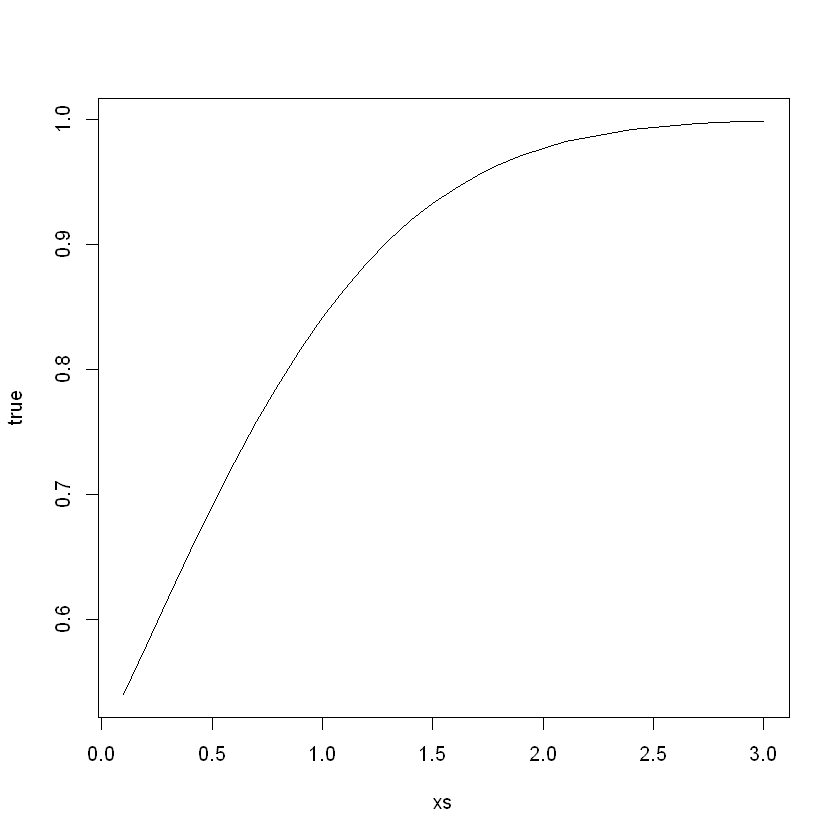

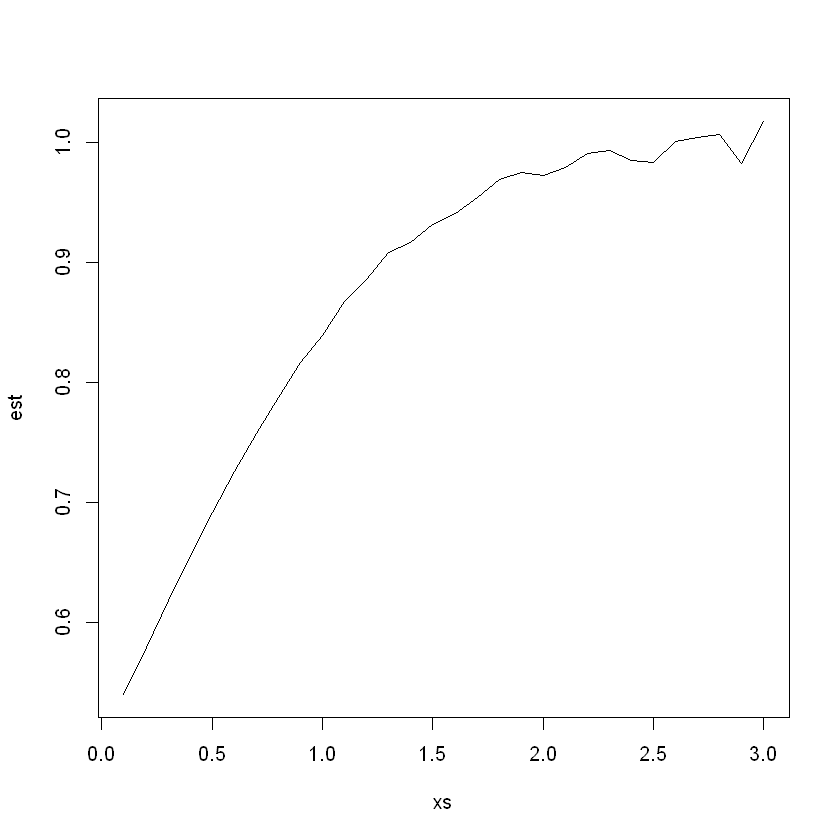

In [23]:
plot(xs, true, 'l')
plot(xs, est, 'l')